In [1]:
import pandas as pd
from pandas import Series, DataFrame
import datetime 
from datetime import datetime


In [2]:
import os
os.getcwd()

'/Users/chereowang27/NYCDSA/Python_Intro_Project'

In [102]:
disney_p = pd.read_csv('/Users/chereowang27/NYCDSA/Python_Intro_Project/data/disney_plus_shows.csv', header=0)
netflix = pd.read_csv('/Users/chereowang27/NYCDSA/Python_Intro_Project/data/netflix_list.csv', header=0)

#convert added at date from str to datetime, make variable for the year, and month-year
disney_p['added_at'] = disney_p["added_at"].apply(lambda s: datetime.strptime(s, "%d-%b-%y"))
disney_p['added_atyear'] = disney_p['added_at'].apply(lambda s: s.strftime('%y'))
disney_p['added_atmonth_year'] = disney_p['added_at'].apply(lambda s: s.strftime('%b-%y'))
disney_p['added_atmonth_year_new'] = pd.to_datetime(disney_p['added_atmonth_year'], format = '%b-%y')

#convert runtime & imdb_rating to numeric
disney_p['runtime'] = disney_p['runtime'].str.split(' ')
disney_p['runtime'] = [pd.to_numeric(val[0:1]) if hasattr(val, '__iter__') else None for val in disney_p["runtime"]]

disney_p['data'] = 'Disney_plus'
netflix['data'] = 'Netflix'
#disney_p['added_atmonth_year'] =  disney_p['added_atyear'].apply(lambda s: datetime.date(s.month, s.year))

hyphen = disney_p['year'].str.split(pat = '-', expand = True ).loc[30,0][4]
df_year = disney_p['year'].str.split(pat = hyphen, expand = True ) \
            .rename(columns = {0:'yearStart', 1: 'yearEnd'})
       

disney_p = pd.concat([disney_p,df_year], axis = 1)

#count the number of movies in each genre
d_movie = disney_p[disney_p['type']=='movie']


In [68]:
genres_disney = set(d_movie['genre'].str.cat(sep = ', ').split(', '))


In [5]:
# This counts the number of titles in each genre
def g_count(col,gn):
    return col.str.contains(gn).sum()

In [6]:
# This generates a data frame of counts of each genre by time (either month or year)
def agg_df(group):
    agg_df = []
    for gn in genres:
        tmp = d_movie.groupby(group).agg(
            **{gn : ('genre', lambda col: g_count(col,gn))}
        )
        agg_df.append(tmp)
    df_agg = pd.concat(agg_df, axis=1).apply(lambda col: col.cumsum())
    return df_agg

In [7]:
#df_agg = pd.concat(agg_df, axis=1).apply(lambda col: col.cumsum())

df_by_month_year = agg_df('added_atmonth_year_new')
df_by_year = agg_df('added_atyear')

In [8]:
import matplotlib as pl
import seaborn as sns

<AxesSubplot:>

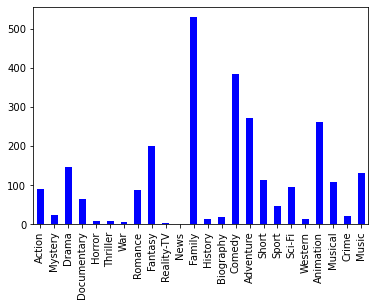

In [9]:
df_by_year.T['20'].plot.bar(color = 'b')

<ipython-input-315-d47d0f27d6de>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


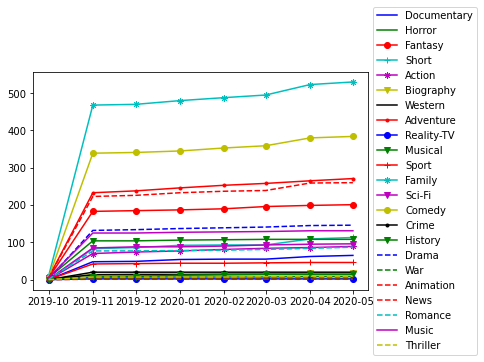

In [315]:
import matplotlib.pyplot as plt
x = df_by_month_year.index
fig = plt.figure()
fig.show()
ax = fig.add_subplot(111)

ax.plot(x,df_by_month_year['Documentary'], c = 'b', label = 'Documentary' )
ax.plot(x,df_by_month_year['Horror'], c = 'g', marker = "", label ='Horror')
ax.plot(x,df_by_month_year['Fantasy'], c = 'r', marker = "o", label ='Fantasy')
ax.plot(x,df_by_month_year['Short'], c = 'c', marker = "+",label ='Short')
ax.plot(x,df_by_month_year['Action'], c = 'm', marker = (8,2,0), label ='Action')
ax.plot(x,df_by_month_year['Biography'], c = 'y', marker = 'v', label = 'Biography')
ax.plot(x,df_by_month_year['Western'], c = 'k', ls = '-', label = 'Western')
ax.plot(x,df_by_month_year['Adventure'], c = 'r', marker = ".",label = 'Adventure' )
ax.plot(x,df_by_month_year['Reality-TV'], c = 'b', marker = "o", label ='Reality-TV' )
ax.plot(x,df_by_month_year['Musical'], c = 'g', marker = "v", label = 'Musical')
ax.plot(x,df_by_month_year['Sport'], c = 'r', marker = "+", label = 'Sport')
ax.plot(x,df_by_month_year['Family'], c = 'c', marker = (8,2,0), label = 'Family')
ax.plot(x,df_by_month_year['Sci-Fi'], c = 'm', marker = "v", label = 'Sci-Fi')
ax.plot(x,df_by_month_year['Comedy'], c = 'y', marker = "o", label = 'Comedy')
ax.plot(x,df_by_month_year['Crime'], c = 'k', marker = '.', label = 'Crime')
ax.plot(x,df_by_month_year['History'], c = 'g', marker = "v", label = 'History')
ax.plot(x,df_by_month_year['Drama'], c = 'b', ls = '--', label = 'Drama')
ax.plot(x,df_by_month_year['War'], c = 'g', ls = '--', label = 'War')
ax.plot(x,df_by_month_year['Animation'], c = 'r', ls = '--', label = 'Animation')
ax.plot(x,df_by_month_year['News'], c = 'r', ls = '--', label = 'News')
ax.plot(x,df_by_month_year['Romance'], c = 'c', ls = '--', label = 'Romance')
ax.plot(x,df_by_month_year['Music'], c = 'm', ls = '-', label = 'Music')
ax.plot(x,df_by_month_year['Thriller'], c = 'y', ls = '--', label = 'Thriller')

plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.draw()


In [10]:
d_movie.groupby('added_atyear').median()['imdb_rating']

added_atyear
19    6.7
20    6.8
Name: imdb_rating, dtype: float64

In [13]:
n_movie = netflix[(netflix['type'] == 'movie') & (netflix['startYear'] == 2020.0)]
n_movie.head()

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
37,tt10886166,365 dni,38,A,2020.0,NaN,NaN,114,movie,Poland,Polish,Massimo is a member of the Sicilian Mafia fami...,"Massimo Torricelli, a young and handsome boss ...",3.3,60267.0,"Drama,Romance",0,"['Anna Maria Sieklucka', 'Michele Morrone', 'B...",https://m.media-amazon.com/images/M/MV5BODljZT...
69,tt2222042,Love and Monsters,70,13,2020.0,NaN,NaN,109,movie,Canada,English,Seven years after he survived the monster apoc...,"Seven years after the Monsterpocalypse, Joel D...",7.0,91971.0,"Action,Adventure,Comedy",0,"[""Dylan O'Brien"", 'Jessica Henwick', 'Michael ...",https://m.media-amazon.com/images/M/MV5BYWVkMW...
104,tt9893250,I Care a Lot,105,18,2020.0,NaN,NaN,118,movie,United States,English,A crooked legal guardian who drains the saving...,"Poised with sharklike self-assurance, Marla Gr...",6.3,101431.0,"Comedy,Crime,Thriller",0,"['Rosamund Pike', 'Peter Dinklage', 'Eiza Gonz...",https://m.media-amazon.com/images/M/MV5BYWU2ZT...
116,tt8580274,Eurovision Song Contest: The Story of Fire Saga,117,PG-13,2020.0,NaN,NaN,123,movie,United States,English,When aspiring musicians Lars and Sigrit are gi...,When aspiring musicians Lars and Sigrit are gi...,6.5,82411.0,"Comedy,Music",0,"['Will Ferrell', 'Rachel McAdams', 'Dan Steven...",https://m.media-amazon.com/images/M/MV5BYzRjYz...
124,tt7395114,The Devil All the Time,125,18,2020.0,NaN,NaN,138,movie,United States,English,Sinister characters converge around a young ma...,"Set in rural southern Ohio and West Virginia, ...",7.1,105158.0,"Crime,Drama,Thriller",0,"['Tom Holland', 'Bill Skarsgård', 'Riley Keoug...",https://m.media-amazon.com/images/M/MV5BZmE1Nm...


In [151]:
allMovie.head()

,imdb_id,rating,genre,data,Comedy
0,tt0147800,7.3,"Comedy, Drama, Romance",Disney_plus,True
2,tt0115433,5.7,"Adventure, Comedy, Crime, Family",Disney_plus,True
3,tt0324941,5.8,"Animation, Adventure, Comedy, Family, Musical",Disney_plus,True
4,tt0211181,4.9,"Adventure, Comedy, Family",Disney_plus,True
5,tt1846442,6.3,"Comedy, Fantasy, Romance",Disney_plus,True


In [140]:
tmp

,rating
data,
Disney_plus,6.7
Netflix,6.2


In [305]:
agg_df('startYear')

,Documentary,Horror,Fantasy,Mystery,Action,Biography,Adventure,Musical,Sport,Family,Sci-Fi,Comedy,Crime,History,Drama,War,Animation,Romance,Music,Thriller
startYear,,,,,,,,,,,,,,,,,,,,
2020.0,44,21,16,16,54,12,32,4,9,24,4,104,42,6,148,3,22,44,25,36


<AxesSubplot:>

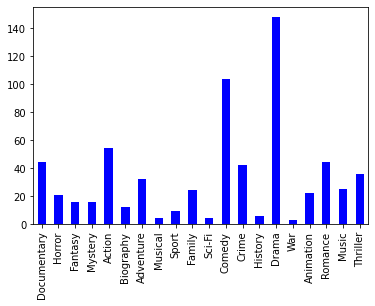

In [310]:
agg_df('startYear').T[2020.0].plot.bar(color = 'b')

In [311]:
n_movie.groupby('startYear').median()['rating']

startYear
2020.0    6.1
Name: rating, dtype: float64